In [1]:
from IPython.display import Image, display
from IPython.core.display import HTML

# Resim URL'si
image_url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR7ltoZT1furs24vWMk_3cKdicA5rIXxpjo_A&usqp=CAU'

# Orta boyut belirlemek için istediğiniz genişlik ve yükseklik değerleri
frame_width = 500
frame_height = 500

# HTML ile resmin genişlik ve yükseklik değerlerini ayarlayarak resmi ortalamak
image_tag = f'<img src="{image_url}" style="width:{frame_width}px; height:{frame_height}px; display: block; margin: 0 auto;">'

# Resmi göstermek
display(HTML(image_tag))

# Introduction
We are working with a dataset that contains information about Airbnb listings in the US. Our goal is to predict the price of a stay in these listings. The dataset consists of 74411 listings and 29 columns. One of the columns, log_price, is the target variable that we are trying to predict

<font color = 'yellow'>
Content: 

1. [Load and Check Data](#1)
1. [Variable Description](#2)
        * [Target Review](#3)
        * [Categorical Variable](#4)
        * [Numerical Variable](#5)
1. [Basic Data Analysis](#6)
1. [Missing Value](#7)
    * [Find Missing Value](#8)
    * [Fill Missing Value](#9)
    
1. [ Outlier Detection](#10)

1. [Visualization](#11)
    * [Correlation Between log_price--accommodates--bathrooms--number_of_reviews--review_scores_rating--bedroom--beds](#12)
    * [accommodates -- log_price](#13)
    * [bathrooms -- log_price](#14)
    * [number_of_reviews -- log_price](#15)
    * [review_scores_rating -- log_price](#16)
    * [bedroom -- log_price](#17)
    * [beds -- log_price](#18)
    
1. [Feature Engineering](#21)
    * [Propetty Type](#22)
    * [Room Type](#23)
    * [Amenities](#24)
    * [Accomodates](#25)
    * [Bathrooms](#26)
    * [Bed Type](#27)
    * [Cleaning Fee- Host has Profile Picture - Host Identity verified - Instant Bookable](#28)
    * [City](#28)
    * [Description](#28)
    * [First Review](#28)
    * [Host Response Rate](#28)
    * [Host Since](#28)
    * [Last Review](#28)
    * [Latitude-Longitude](#28)
    * [Name](#28)
    * [Neighbourhood](#28)
    * [Review Scores Rating](#28)
    * [Thumbnail URL](#28)
    * [Zipcode](#28)
    * [Bedrooms](#28)
    * [Beds](#28)

1. [Modeling](#29)

    * [Train - Test Split](#30)
    * [Simple Logistic Regression](#31)
    * [Hyperparameter Tuning -- Grid Search -- Cross Validation](#32) 
    * [Ensemble Modeling](#33)
    * [Prediction and Submission](#34)

In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import missingno as msno

import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

import seaborn as sns
import re

from scipy import stats
import statsmodels.api as sm


from collections import Counter

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk(''):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

C:\Users\dell\AppData\Local\Temp\ipykernel_28708\3886533607.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


1. <a id = "1"></a><br>
# Load and Check Data

In [7]:
cwd = os.getcwd()  # your current working directory (cwd)
files = os.listdir(cwd)  # This will Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

Files in 'c:\\info_tech_dersler\\ml_prj_airbnb\\ML_Project_Group_B': ['.git', 'Column_description.xlsx', 'Feature_Engineering.ipynb', 'Main.ipynb', 'Missing_Values.ipynb', 'modelling.ipynb', 'Outliers.ipynb', 'README.md', 'train.csv', 'Visualization.ipynb', 'zipcode_LA_DC_NY.csv', 'zipcode_usa.csv']


In [8]:
df_original = pd.read_csv('train.csv')
df = df_original.copy()

2. <a id = "2"></a><br>
# Variable Description


1. Id: It can be considered as a transaction registration number.

2. log_price: Price per night for rental. (TARGET)

3. property_type: Type of property to be rented.('Apartment' 'House' 'Condominium' 'Loft' 'Townhouse' 'Hostel''Castle' 'Cabin' 'Treehouse'...)

4. room_type: The type of room to be rented. ('Entire home/apt' 'Private room' 'Shared room')

5. amenities: The essential items a guest expects to have a comfortable stay.("Wireless Internet","Air conditioning",Kitchen,"Free parking on premises","Smoke detector","Carbon monoxide detector","First aid kit","Safety card"...)

6. accommodates: Number of guests the rental can host. 

7. bathrooms:The number of bathroom found in the accommodation

8. bed_type: The type of bed found in the accommodation.(Real Bed, Futon, Pull-out Sofa, Couch, Airbed) 

9. cancellation_policy: Determines the amount of refund a guest will receive if they cancel their reservation. (strict, moderate, flexible, super_strict_30, super_strict_60)

10. cleaning_fee: Fee for cleaning the area you are staying in. (True, False)

11. city: Cities where the facility is located.(NYC, SF, DC, LA, Chicago, Boston)  

12. description: Detailed description of the space, usually including the room's features, amenities, location, and any special considerations or rules guests should be aware of.

13. first_review: Date of first feedback a guest leaves after staying at a particular property.

14. host_has_profile_pic: Whether the host has a profile picture (True, False)

15. host_identity_verified: Whether the host's identity has been confirmed. (True, False)

16. host_response_rate: Percentage of replies to host messages within a given time frame.

17. host_since: The date a host joined Airbnb and started using their property on the platform.

18. instant_bookable: Allows guests to book listings without having to wait for host's approval. (True, False)

19. last_review: The date when a guest last left feedback about their stay at that property.

20. latitude: Latitude value of the location of the facility.

21. longitude: Longtitude value of the location of the facility.

22. name: A descriptive or catchy headline that hosts use to attract guests.

23. neighbourhood: The specific district or district in which a property is located.

24. number_of_reviews: Represents the total number of reviews posted by guests staying at the property.

25. review_scores_rating: Value that represents the overall rating or evaluation given by guests to a host or accommodation. 

26. thumbnail_url: A web link address that points to a thumbnail image of a record.

27. zipcode: Zip code of the place where the accommodation is located

28. bedrooms: The number of separate bedrooms available to guests.

29. beds: The number of beds included in the rental

3. <a id = "3"></a><br>
# Basic Data Analysis


In [9]:
df.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [10]:
#pd.set_option('display.max_columns', len(df.columns)) # To view all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)


In [11]:
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,t,t,NaN,2012-03-26,f,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,2017-08-05,t,f,100%,2017-06-19,t,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,2017-04-30,t,t,100%,2016-10-25,t,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,NaN,t,t,NaN,2015-04-19,f,NaN,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",2015-05-12,t,t,100%,2015-03-01,t,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [12]:
df.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


In [13]:
# Check Unique, Missing and Duplicated values

summary = pd.DataFrame(index=df.columns)
summary["Unique"] = df.nunique().values
summary["Duplicated"] = df.duplicated().sum()
summary["Missing"] = df.isnull().sum()
summary["Missing Percentage"] = (df.isnull().sum() / len(df)) * 100
summary["Types"] = df.dtypes
summary_styled = summary.style.background_gradient()
    
summary_styled

,Unique,Duplicated,Missing,Missing Percentage,Types
id,74111,0,0,0.000000,int64
log_price,767,0,0,0.000000,float64
property_type,35,0,0,0.000000,object
room_type,3,0,0,0.000000,object
amenities,67122,0,0,0.000000,object
accommodates,16,0,0,0.000000,int64
bathrooms,17,0,200,0.269865,float64
bed_type,5,0,0,0.000000,object
cancellation_policy,5,0,0,0.000000,object
cleaning_fee,2,0,0,0.000000,bool


* [Target Review](#3)

In [14]:
target = df['log_price']
df['price'] = np.exp(target)
df['price']

0        150.0
1        169.0
2        145.0
3        750.0
4        115.0
         ...  
74106    100.0
74107    155.0
74108    185.0
74109    195.0
74110    128.0
Name: price, Length: 74111, dtype: float64

 Using the np.exc() function, the inverse of the logarithmic transformation is applied for the log_price column.
Purpose: to reach the original target and examine it

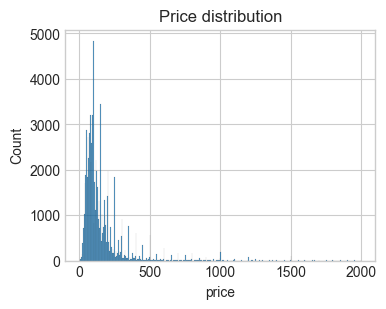

In [15]:
# histogram plot of the price column
plt.figure(figsize = (4, 3))
sns.histplot(df["price"])
plt.title('Price distribution')
plt.show()

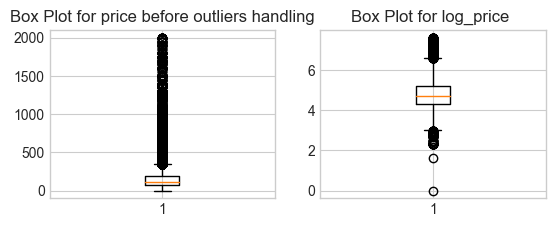

In [16]:
# Displaying the price column with a box plot
plt.figure()
plt.subplot(2, 2, 1)
plt.boxplot(df['price'])
plt.title(f"Box Plot for {'price'} before outliers handling")

plt.subplot(2, 2, 2)
plt.boxplot(df['log_price'])
plt.title(f"Box Plot for {'log_price'} ")

plt.show()

In [17]:
# Calculating outliers with Z score
z_scores = stats.zscore(df['price'])
outlier_threshold = 3
outliers_price = df['price'][abs(z_scores) > outlier_threshold]
outliers_price

3         750.0
24       1050.0
52        750.0
62       1000.0
105       700.0
          ...  
73939     838.0
73953     925.0
73957     800.0
74031    1000.0
74081    1000.0
Name: price, Length: 1593, dtype: float64

In [18]:
## Normality Test -price-
# Shapiro-Wilk test
shapiro_stat, shapiro_pvalue = stats.shapiro(df['price'])
shapiro_normal = shapiro_pvalue > 0.05
print(f"Shapiro-Wilk test - Normal: {shapiro_normal}")

Shapiro-Wilk test - Normal: False


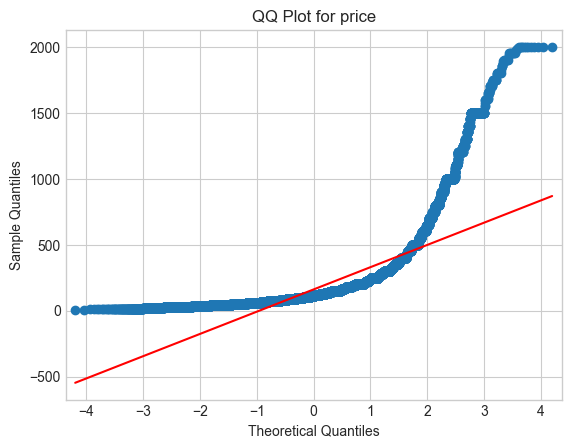

In [19]:
import statsmodels.api as sm
# Perform normality check using QQ plot
# Create QQ plot
sm.qqplot(df['price'], line='s')
plt.title(f"QQ Plot for {'price'}")
plt.show()

## Tranformation price

!!
clarification: Outliers of the price column have not been handled yet. but we wanted to see the transformation of the column. will be rearranged after outliers are decided


Text(0.5, 1.0, 'power_price in Power Transformation')

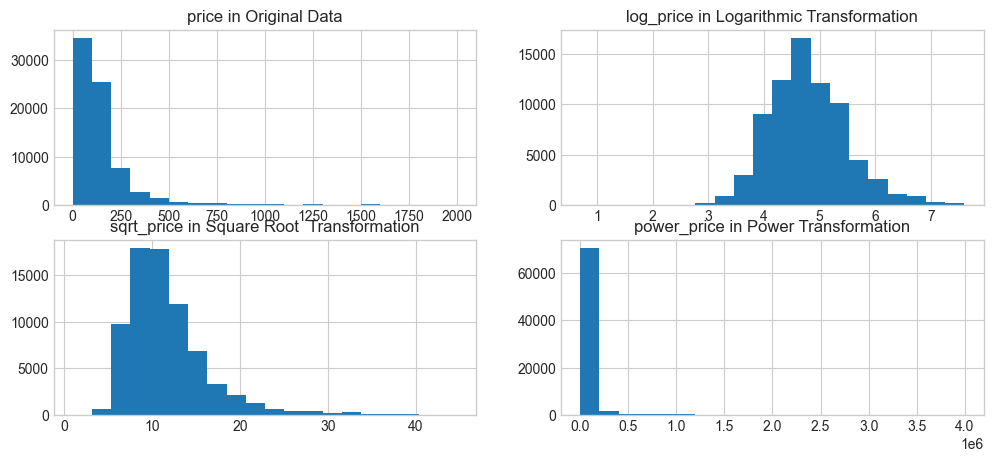

In [20]:
log_price = df['price']
log_transformed_df = np.log1p(log_price)

sqrt_price = df['price']
sqrt_transformed_df = np.sqrt(sqrt_price)

power_price = df['price']
power_transformed_df = np.power(power_price, 2)

plt.figure(figsize=(12, 5))
#log transformation
plt.subplot(2, 2, 1)
plt.hist(df['price'], bins=20)
plt.title('price in Original Data')
plt.subplot(2, 2, 2)
plt.hist(log_transformed_df, bins=20)
plt.title(f'log_price in Logarithmic Transformation')
#Square Root Transformation
plt.subplot(2, 2, 3)
plt.hist(sqrt_transformed_df, bins=20)
plt.title(f'sqrt_price in Square Root  Transformation')
#Power Transformation
plt.subplot(2, 2, 4)
plt.hist(power_transformed_df, bins=20)
plt.title(f'power_price in Power Transformation')

* [Categorical Variable](#4)

In [21]:
categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
categorical_columns

['property_type',
 'room_type',
 'amenities',
 'bed_type',
 'cancellation_policy',
 'city',
 'description',
 'first_review',
 'host_has_profile_pic',
 'host_identity_verified',
 'host_response_rate',
 'host_since',
 'instant_bookable',
 'last_review',
 'name',
 'neighbourhood',
 'thumbnail_url',
 'zipcode']

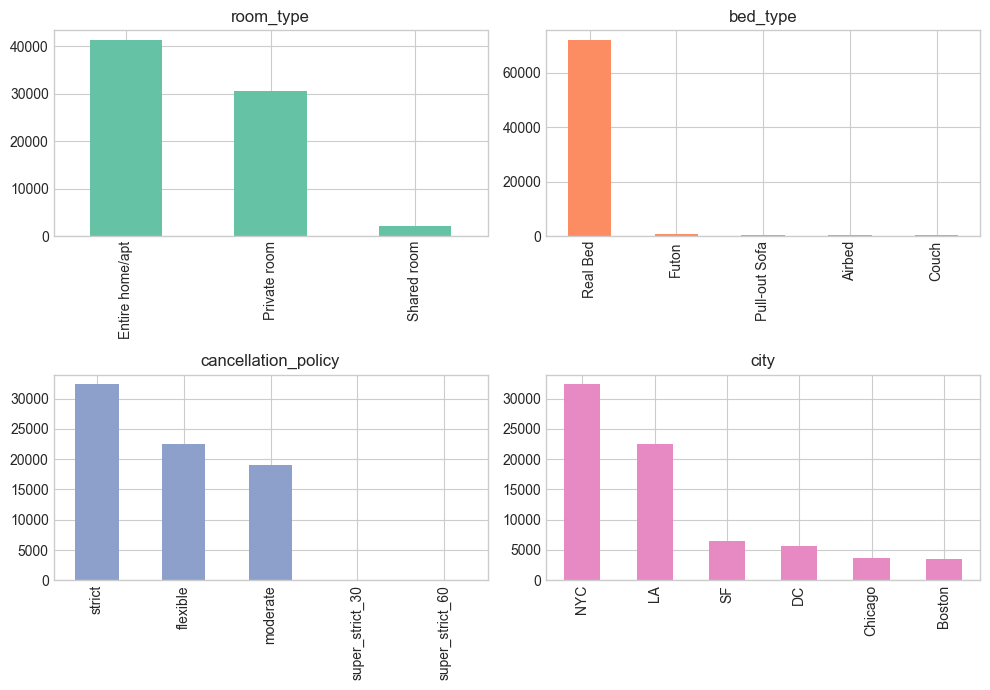

In [22]:
plt.figure(figsize=(10, 7))

columns = ['room_type', 'bed_type', 'cancellation_policy', 'city']
colors = sns.color_palette('Set2', len(columns)) 

for i, column in enumerate(columns):
    plt.subplot(2, 2, i + 1)
    df[column].value_counts().plot(kind='bar', title=column, color=colors[i])
    plt.xlabel('')

plt.tight_layout()
plt.show()

* [Numerical Variable](#5)

In [23]:
numerical_columns = df.select_dtypes(include=['int', 'float']).columns
numerical_columns

Index(['id', 'log_price', 'accommodates', 'bathrooms', 'latitude', 'longitude',
       'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds',
       'price'],
      dtype='object')

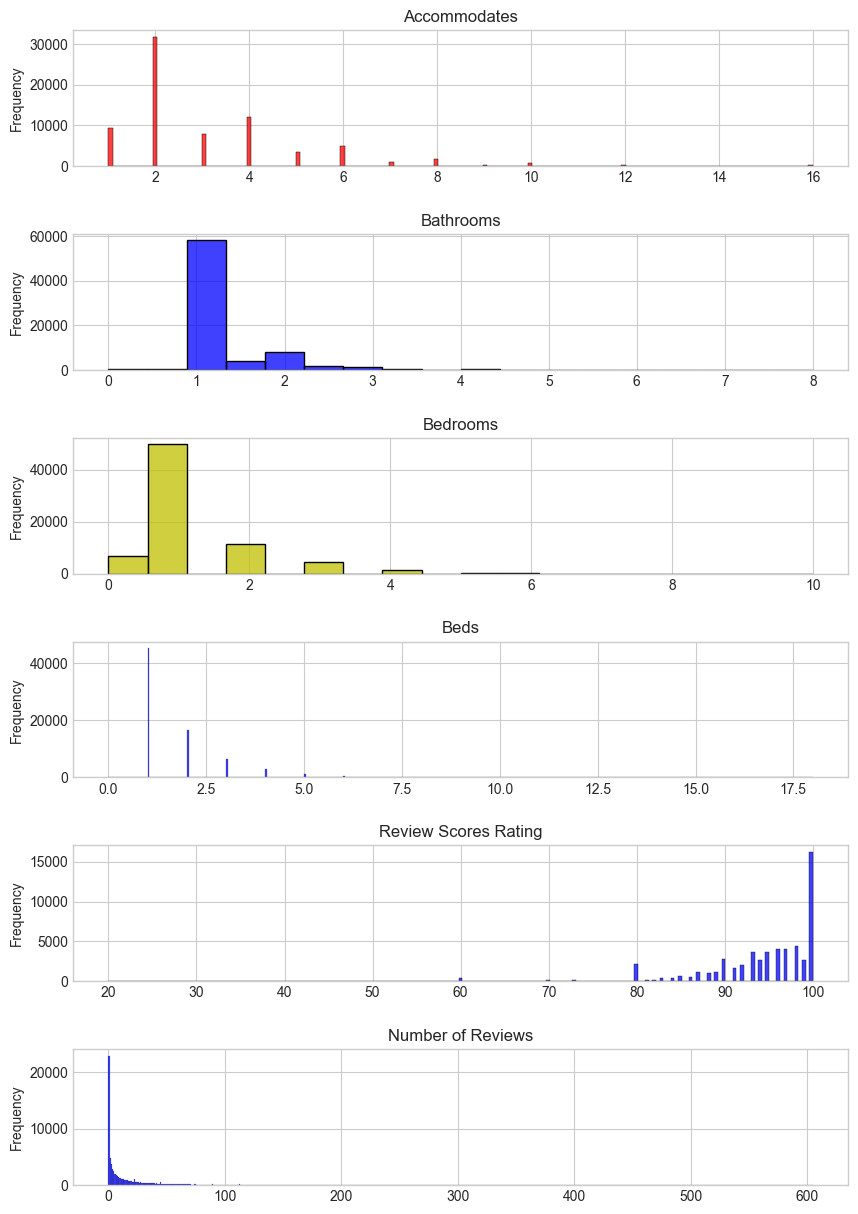

In [ ]:
fig, ax = plt.subplots(6, 1, figsize=(10, 15))
plt.subplots_adjust(hspace=0.5)

columns = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating', 'number_of_reviews']
colors = ['r', 'b', 'y', 'b', 'b', 'b']
titles = ['Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Review Scores Rating', 'Number of Reviews']

for i in range(len(columns)):
    sns.histplot(df[columns[i]], color=colors[i], ax=ax[i])
    ax[i].set_title(titles[i])
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Frequency')

plt.show()

4. <a id = "4"></a><br>
# Missing Value

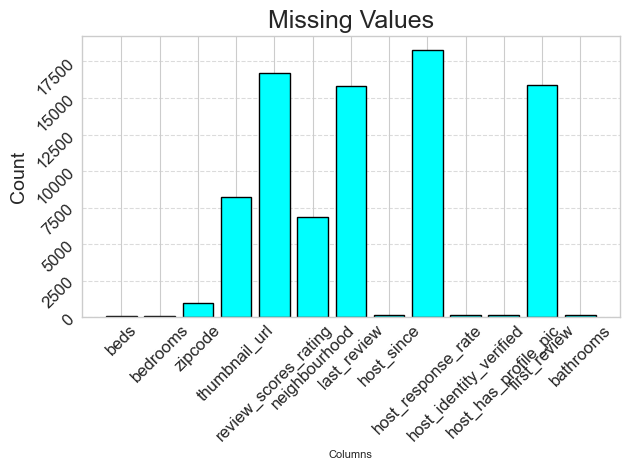

In [24]:
missing_values = df.isnull().sum()

# Filter columns with missing values
missing_values = missing_values[missing_values > 0]

# Create a vertical bar chart to show missing values
plt.bar(missing_values.index, missing_values.values, color='cyan', edgecolor='black')

# Customize the chart
plt.title('Missing Values', fontsize=18)
plt.xlabel('Columns', fontsize=8)
plt.ylabel('Count', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12, rotation=45)  # Rotate the x-axis labels for better visibility
plt.gca().invert_xaxis()  # Display bars from right to left
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add vertical grid lines

# Show the plot
plt.tight_layout()
plt.show()

* bedrooms

In [26]:
import numpy as np

keywords = ['one bedroom', 'bedroom', 'two bedrooms', 'bedrooms']

# Filter rows where the 'description' column contains the keywords and the 'bedrooms' column is NaN
filtered_data = df[(df['description'].str.contains('|'.join(keywords), na=False)) & (df['bedrooms'].isna())]

# Fill the 'bedrooms' column with 1 for specific 'id' values
ids = filtered_data['id'].tolist()  # Get the id values from the filtered dataset
df.loc[df['id'].isin(ids), 'bedrooms'] = df.loc[df['id'].isin(ids), 'bedrooms'].fillna(1)

# Get the number of observations in the filtered dataset
num_rows = len(filtered_data)
print("Number of observations in the filtered dataset:", num_rows)

Number of observations in the filtered dataset: 8


The purpose of this code is to filter rows that have specific keywords in the 'description' column and empty 'bedrooms' values. It then updates the 'bedrooms' column for these filtered rows to 1 and prints the number of observations in the filtered dataset.

In [27]:
df['bedrooms'].isnull().sum()

83

In [28]:
df["bedrooms"] = df['bedrooms'].fillna((df["bedrooms"].mean()))

In [29]:
df['bedrooms'].isnull().sum()

0

* thumbnail_url

In [ ]:
   # making new feature "is_thumbnail_exist"
df['is_thumbnail_exist']= df.thumbnail_url.fillna(0).apply(lambda x: False if x == 0 else True)
df.head()

* zipcode

In [ ]:
df['zipcode'] = pd.to_numeric(df['zipcode'],errors='coerce')

In [ ]:
correlation = df['log_price'].corr(df['zipcode'])
print("Correlation:", correlation)

Correlation: 0.03402257978807774


In [ ]:
#pip install uszipcode    # installing Library to find zip code from latitude and longitude information using us zip code
from uszipcode import SearchEngine

search = SearchEngine()
zipcodes = []
for index, row in df.iterrows():
    latitude = row['latitude']  # Latitude 
    longitude = row['longitude']  # Longitude 

    result = search.by_coordinates(latitude, longitude)
    if result:
        zipcode = result[0].zipcode
        zipcodes.append(zipcode)
    else:
        zipcodes.append(None)  # None if postal code not found or incorrect

df['Zipcode'] = zipcodes  # Adds a new Zipcode column

In [ ]:
df[['Zipcode','zipcode']].head(40)   #comparing two columns for first observation

,Zipcode,zipcode
0,11201,11201.0
1,10019,10019.0
2,10037,10027.0
3,94115,94117.0
4,20010,20009.0
5,94114,94131.0
6,90292,90292.0
7,90017,90015.0
8,94121,94121.0
9,91748,91748.0


In [ ]:
df['Zipcode'].isnull().sum()

In [ ]:
filtered_zip =df[df['Zipcode'].isna()][['neighbourhood','city','latitude','zipcode']]
print(filtered_zip)

* Neighbourhood

In [ ]:
from uszipcode import SearchEngine
from geopy.geocoders import Nominatim
# taking zipcodes
zipcodes = df['Zipcode']
#print(zipcodes)

In [ ]:


# Nominatim geocoder'ı başlatın
geolocator = Nominatim(user_agent='my_app')

# Zip kodlarına göre mahalleleri alın
neighbourhoods = []
for zipcode in zipcodes:
    try:
        location = geolocator.geocode(zipcode)
        neighbourhood = location.raw['address'].get('neighbourhood', 'Unknown')
        neighbourhoods.append(neighbourhood)
    except Exception as e:
        print(f"Hata: {e} - Zip kodu: {zipcode}")

# "neighbourhood" sütununu oluşturun
df['neighbourhoods'] = neighbourhoods

# Sonucu yazdırın
print(df[['neighbourhoods', 'neighbourhood']])

In [ ]:
# SearchEngine'i başlatın
search = SearchEngine

# Zip kodlarına göre mahalleleri alın
neighbourhoods = []
for zipcode in zipcodes:
    try:
        result = search.by_zipcode(zipcode)
        neighbourhood = result.major_city if result.major_city else "Unknown"
        neighbourhoods.append(neighbourhood)
    except Exception as e:
        print(f"Hata: {e} - Zip kodu: {zipcode}")

In [ ]:
df['neighbourhoods'] = neighbourhoods

In [ ]:

print(df[['neighbourhood', 'neighbourhoods']])


In [ ]:
#MAhallelerin bulunduğu şehir için yeni bir sütun oluşturdum. neıghbourhood yerine kullanılabilir.

df['city-neigh'] = df['city'] + '-' + df['neighbourhood']
df['city-neigh'].value_counts()

city-neigh
NYC-Williamsburg                          2862
NYC-Bedford-Stuyvesant                    2166
NYC-Bushwick                              1601
NYC-Upper West Side                       1396
LA-Mid-Wilshire                           1392
NYC-Harlem                                1374
LA-Hollywood                              1321
NYC-Hell's Kitchen                        1299
LA-Venice                                 1222
NYC-Upper East Side                       1206
NYC-Crown Heights                         1076
NYC-Astoria                                898
NYC-Lower East Side                        833
NYC-East Village                           814
NYC-East Harlem                            793
SF-Mission District                        784
LA-West Hollywood                          729
NYC-Chelsea                                726
NYC-Greenpoint                             725
NYC-Washington Heights                     721
NYC-Hamilton Heights                       628
NY

* host_response_rate

In [ ]:
df.host_response_rate = df.host_response_rate.apply(lambda x: int(x[:len(x)-1])/100 if isinstance(x,str) else x )
df.host_response_rate = df.host_response_rate.fillna(df.host_response_rate.mean())

* last_review

In [ ]:
#check with first review 
nan_rows = df[df['first_review'].isnull()]
nan_last_review_count = np.sum(nan_rows['last_review'].isnull())
nan_last_review_count
# We detected that the values that are Nan in the last review are Nan in the first review values.

In [ ]:
df.last_review.fillna(method="ffill",inplace=True)

* review_scores_rating

In [ ]:
# The "number_of_reviews" column values are directly related to the values in the "review_scores_rating" column
filtered_review = df[["number_of_reviews","review_scores_rating"]][df.number_of_reviews == 0]
filtered_review

In [ ]:
# We compared the Nan-valued rows of the "review_scores_rating" column with the 0 values of the "number_of_reviews" column. 
# If the value is 0, we set the Nan value to 0.
zero_reviews_nan_scores = df[(df['number_of_reviews'] == 0) & (df['review_scores_rating'].isnull())]
df.loc[zero_reviews_nan_scores.index, 'review_scores_rating'] = 0

In [ ]:
#filled the remaining missing values with the mean
df['review_scores_rating'].fillna(df['review_scores_rating'].mean(), inplace=True)

* beds

In [ ]:
#The number of beds is directly related to the bedroom and bed_type column.
result = df.loc[df['beds'].isnull(), 'bed_type'].value_counts() # boş olan beds değerlerinin, bed_type değerleri
result

In [ ]:
## the values of the empty beds, the bedrooms values
result = df.loc[df['beds'].isnull(), 'bedrooms'].value_counts()
result 

In [ ]:
# We filled the empty beds with 1, those whose bedroms value is empty and 1, and those whose bed_type value is Real Bed. 
# We completed the remaining empty values with the value of bedrooms.
df.loc[((df['beds'].isnull()) | (df['beds'] == 0)) & (df['bedrooms'] == 1) & (df['bed_type'] == 'Real Bed'), 'beds'] = 1
df.loc[df['beds'].isnull(), 'beds'] = df['bedrooms']

5. <a id = "5"></a><br>
# Outlier Detection

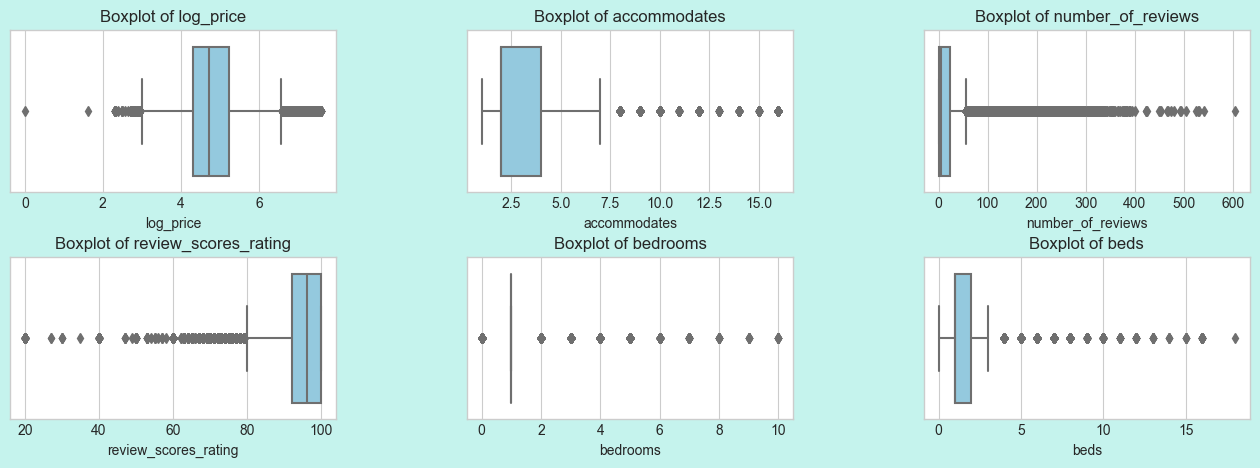

In [ ]:
# Columns where we want to find outliers
outliers_columns = ['log_price', 'accommodates', 'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds']

fig = plt.figure(facecolor='#C5F3ED', figsize=(16, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Let's loop the columns and draw the boxplot
for num, column_name in enumerate(outliers_columns, start=1):
    ax = fig.add_subplot(3, 3, num)
    sns.boxplot(x=df[column_name], color='skyblue', ax=ax)
    ax.set_title(f"Boxplot of {column_name}")

plt.show()

In [ ]:
def find_column_outliers(df, column_name):
    column = df[column_name]
    Q1 = np.quantile(column, 0.25)
    Q3 = np.quantile(column, 0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - (1.5 * IQR)
    upper_limit = Q3 + (1.5 * IQR)
    outliers = column[(column < lower_limit) | (column > upper_limit)]
    return outliers

for column_name in outliers_columns:
    outliers = find_column_outliers(df, column_name)
    print(f"Outliers in '{column_name}':")
    print(outliers)
    print("===")

Outliers in 'log_price':
3        6.620073
24       6.956545
52       6.620073
62       6.907755
148      7.150701
           ...   
73939    6.731018
73953    6.829794
73957    6.684612
74031    6.907755
74081    6.907755
Name: log_price, Length: 1532, dtype: float64
===
Outliers in 'accommodates':
19        8
42        8
62        9
104       9
109       9
         ..
74031     8
74032    10
74042     8
74081    16
74102    10
Name: accommodates, Length: 3604, dtype: int64
===
Outliers in 'number_of_reviews':
8        159
10        82
21        57
22        73
32       248
        ... 
74037    158
74057     89
74082     60
74098    177
74110    205
Name: number_of_reviews, Length: 8203, dtype: int64
===
Outliers in 'review_scores_rating':
Series([], Name: review_scores_rating, dtype: float64)
===
Outliers in 'bedrooms':
Series([], Name: bedrooms, dtype: float64)
===
Outliers in 'beds':
Series([], Name: beds, dtype: float64)
===


We tried the IQR (Interquartile Range) Method, Winsorizing Method, Robust Scaling and Capping and Flooring methods, which are the methods of processing outliers on our data. We chose the most suitable IQR (Interquartile Range) Method to better analyze our data.

In [ ]:
# Let's set the lower and upper percentiles to handle outliers
lower_limit = 0.05
upper_limit = 0.95

outliers_columns = ['log_price', 'accommodates', 'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds']

def handle_outliers(df, column_name, lower_limit, upper_limit):
    column = df[column_name]
    Q1 = column.quantile(lower_limit)
    Q3 = column.quantile(upper_limit)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    df[column_name] = np.clip(df[column_name], lower_bound, upper_bound)

# Deal with outliers
for column_name in outliers_columns:
    handle_outliers(df, column_name, lower_limit, upper_limit)

# show the updated dataframe
print(df)

             id  log_price property_type        room_type  \
0       6901257   5.010635     Apartment  Entire home/apt   
1       6304928   5.129899     Apartment  Entire home/apt   
2       7919400   4.976734     Apartment  Entire home/apt   
3      13418779   6.620073         House  Entire home/apt   
4       3808709   4.744932     Apartment  Entire home/apt   
...         ...        ...           ...              ...   
74106  14549287   4.605170     Apartment     Private room   
74107  13281809   5.043425     Apartment  Entire home/apt   
74108  18688039   5.220356     Apartment  Entire home/apt   
74109  17045948   5.273000     Apartment  Entire home/apt   
74110   3534845   4.852030          Boat  Entire home/apt   

                                               amenities  accommodates  \
0      {"Wireless Internet","Air conditioning",Kitche...             3   
1      {"Wireless Internet","Air conditioning",Kitche...             7   
2      {TV,"Cable TV","Wireless Internet","Ai

accommodates

* Bu kısma alt satırdaki kodun açıklşaması yazılacak. Alttaki kod silinecek

accommadate sutununun outlier analizi:IQR analzi yaptigimizda 3604 adet outlier bulduk .ancak bunlari inceledigimizde cok sayida property_type degeri Loft olan degerle karsilastik.Loft turundeki kiralik mulkler genellikle yatak odasi ya da yatak olmayan ama cok sayida insanin bulusabilecegi mekanlar oldugunu gözlemledik.8,9,....16 gibi degerlerin outlier olamayacagini gözlemledik.Outlier olarak gözuken , Bedroom Sayısı 0 veya 1 Olan, Bed Sayısı 3'ten Küçük ve emlek turu Loft Olmayan degerlerin 110 oldugunu bulduk.Onlarin da description sutunundaki bilgilerini inceledigimizde outlier olmadigini gözlemledik.bu sutunda outlier olmadigina karar verdik


When we conducted an IQR analysis on the 'accommodates' column, we found 3604 outliers. However, upon examining them, we noticed a significant number of properties with the 'Loft' property type. We observed that rental properties of the 'Loft' type are typically spaces where there may not be bedrooms or beds but can accommodate a large number of people. Values like 8, 9, ... 16 should not be considered outliers in this case. We found that there are 110 values that are considered outliers, which have a bedroom count of 0 or 1, bed count less than 3, and property type other than 'Loft'. Upon inspecting their descriptions, we observed that they are not outliers. Therefore, we concluded that there are no outliers in the 'description' column.

bedrooms    &     beds

6. <a id = "5"></a><br>
# Visualization

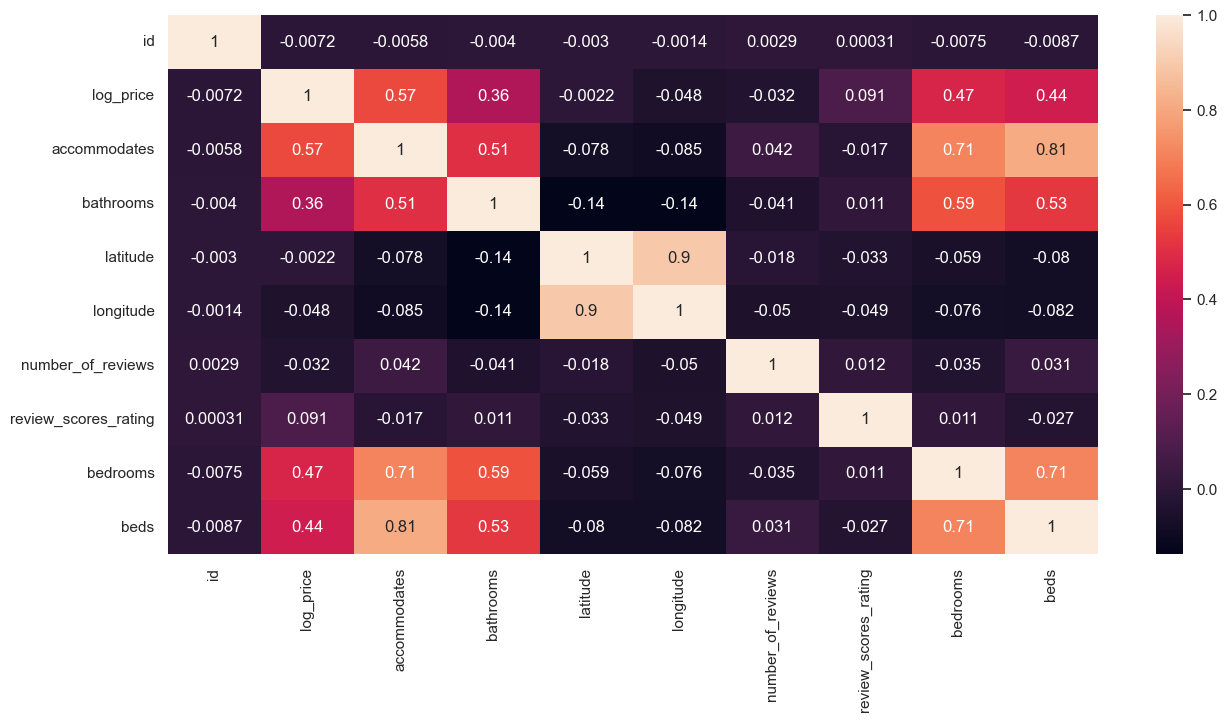

In [ ]:
# Correlation of numerical columns
numerical_columns = df.select_dtypes(include=['int', 'float'])
sns.set(font_scale=1.0)
plt.figure(figsize=(15,7))
sns.heatmap(numerical_columns.corr(), annot=True)
plt.show()

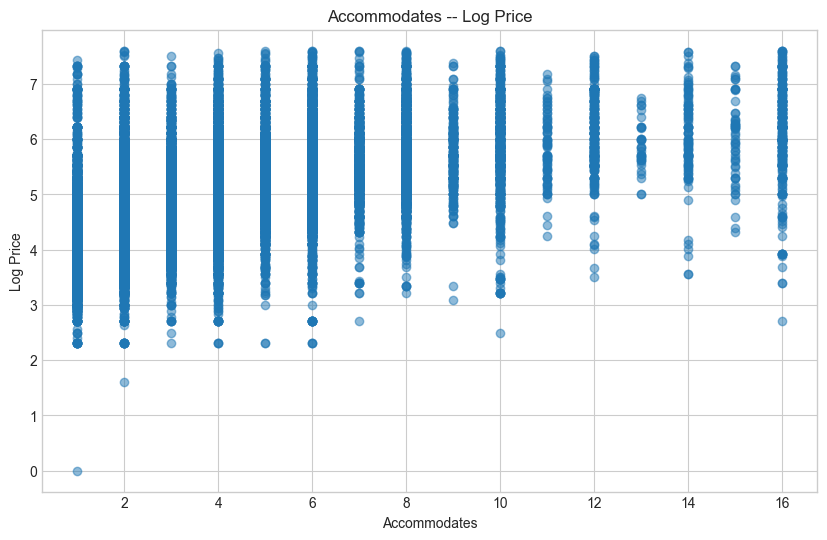

In [ ]:
# Showing the relationship between "accommodates" and "log_price"
plt.figure(figsize=(10, 6))
plt.scatter(df['accommodates'], df['log_price'], alpha=0.5)
plt.xlabel('Accommodates')
plt.ylabel('Log Price')
plt.title('Accommodates -- Log Price')
plt.show()

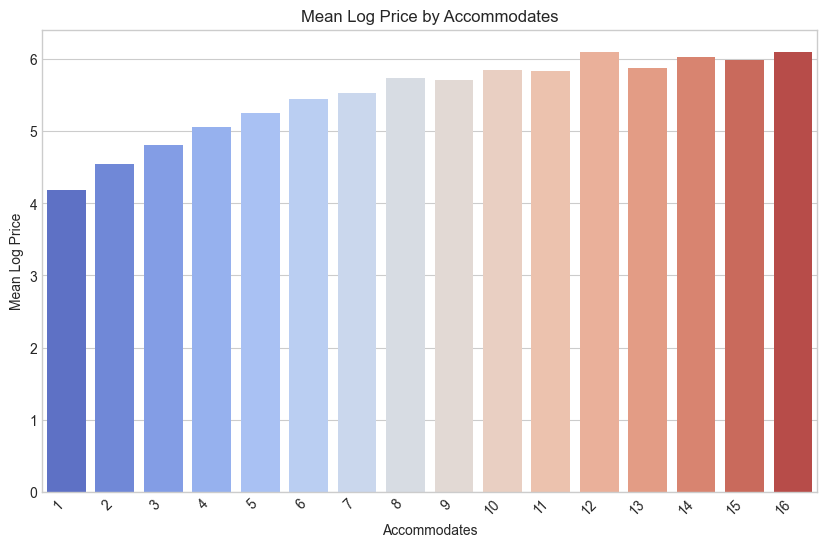

In [ ]:
# Let's divide the "accommodates" column into categorical groups and calculate the "log_price" averages. 
# In this way, we can better see the effect on the price.

grouped_data = df.groupby('accommodates')['log_price'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_data.index, y=grouped_data, palette='coolwarm')
plt.xlabel('Accommodates')
plt.ylabel('Mean Log Price')
plt.title('Mean Log Price by Accommodates')
plt.xticks(rotation=45, ha='right')
plt.show()

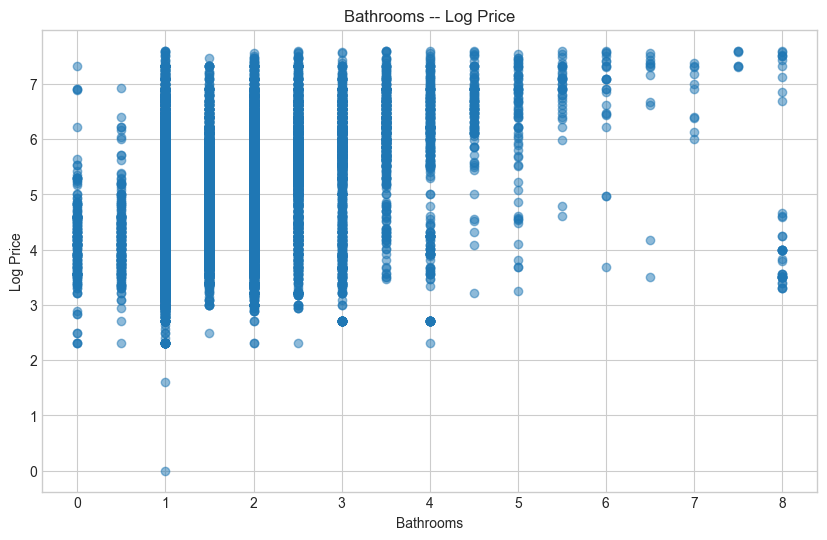

In [ ]:
# Showing the relationship between "bathrooms" and "log_price"
plt.figure(figsize=(10, 6))
plt.scatter(df['bathrooms'], df['log_price'], alpha=0.5)
plt.xlabel('Bathrooms')
plt.ylabel('Log Price')
plt.title('Bathrooms -- Log Price')
plt.show()

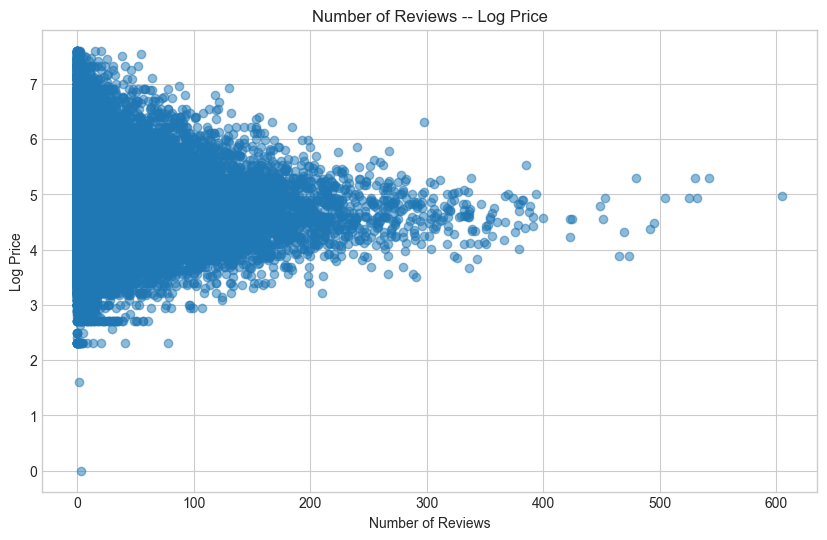

In [ ]:
# Showing the relationship between "number_of_reviews" and "log_price"
plt.figure(figsize=(10, 6))
plt.scatter(df['number_of_reviews'], df['log_price'], alpha=0.5)
plt.xlabel('Number of Reviews')
plt.ylabel('Log Price')
plt.title('Number of Reviews -- Log Price')
plt.show()


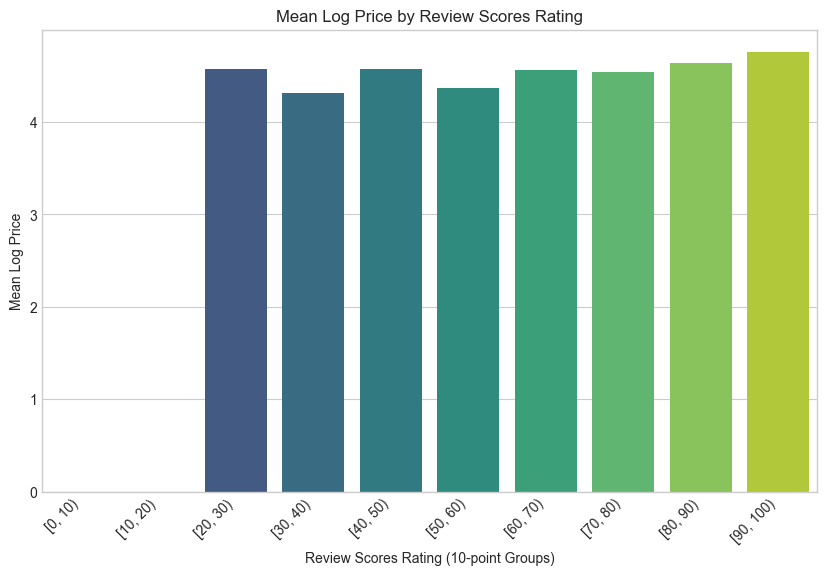

In [ ]:
# Divide the "review_scores_rating" values into 10 groups.Showing the relationship between "review_scores_group" and "log_price"

df['review_scores_group'] = pd.cut(df['review_scores_rating'], bins=range(0, 110, 10), right=False)
grouped_data = df.groupby('review_scores_group')['log_price'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_data.index.astype(str), y=grouped_data, palette='viridis')
plt.xlabel('Review Scores Rating (10-point Groups)')
plt.ylabel('Mean Log Price')
plt.title('Mean Log Price by Review Scores Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

7. <a id = "5"></a><br>
# Data Converting

* property_type

In [ ]:
top_10_property_types = df['property_type'].value_counts().head(10).index.tolist()

# Diğer değerleri "Other" olarak işaretleyin
df['property_type'] = df['property_type'].apply(lambda x: x if x in top_10_property_types else 'Other')

# One-Hot Encoding 
df= pd.get_dummies(df,columns=['property_type'])

In [ ]:
property_types = df['cancellation_policy'].value_counts().head(3).index.tolist()

# Merge super_strict_30 and super_strict_60 with strict
df['cancellation_policy'] = df['cancellation_policy'].apply(lambda x: x if x in property_types else 'strict')

# One-Hot Encoding 
df= pd.get_dummies(df,columns=['cancellation_policy'])
 

* room_type - bed_type -  cancellation_policy - city

In [ ]:
# Columns to one-hot encode
columns_to_encode = ["room_type", "bed_type", "cancellation_policy", "city"]

# Apply one-hot encoding using a for loop
for col in columns_to_encode:
    df = pd.get_dummies(df, columns=[col])

* bathrooms

In [ ]:
filtered_bath = df[(df['description'].str.contains('bathroom', na=False)) & (df['bathrooms'].isna())]

In [ ]:
def convert_bathroom_description(description):
    #if ('one bathroom') or ('1 bathroom') or ('1full') or ('full') or ('shared') or ('Shared') or ('Private') or ('SHARED') or ('attractive') in description.lower():
    #    return 1
    if ("two bathrooms") or  ('2 bathrooms') in description.lower():
        return 2
    elif '3 bathrooms' in description.lower():
        return 3
    elif '4 bathrooms' in description.lower():
        return 4 
    elif ('one bathroom') or ('1 bathroom') or ('1full') or ('full') or ('shared') or ('Shared') or ('Private') or ('SHARED') or ('attractive') in description.lower():
        return 1
    else:
        #return 1
        return None

# Print the results from the "filtered_bath" DataFrame as numeric values in the "bathrooms" column
df.loc[filtered_bath.index, 'bathrooms'] = filtered_bath['description'].apply(convert_bathroom_description)

In [ ]:
df['bathrooms'] = df['bathrooms'].fillna(1)

* cleaning_fee - host_has_profile_pic - host_identity_verified - instant_bookable  

In [ ]:
df['cleaning_fee'] = df['cleaning_fee'].replace({False: 0, True: 1})
df['host_has_profile_pic'] = df['host_has_profile_pic'].replace({'t': 1, 'f': 0})
df['host_identity_verified'] = df['host_identity_verified'].replace({'t': 1, 't': 0})
df['instant_bookable'] = df['instant_bookable'].replace({'t': 1, 'f': 0})

8. <a id = "8"></a><br>
# Feature Engineering

* amenities

In [ ]:
df['amenities'] = df['amenities'].map(lambda x: x.replace('"', '').replace('{', '').replace('}', '').split(','))

In [ ]:
amenities = {x for xs in df['amenities'].tolist() for x in xs}
amenities.remove('')
amenities.remove('translation missing: en.hosting_amenity_49')
amenities.remove('translation missing: en.hosting_amenity_50')
amenities = list(amenities)

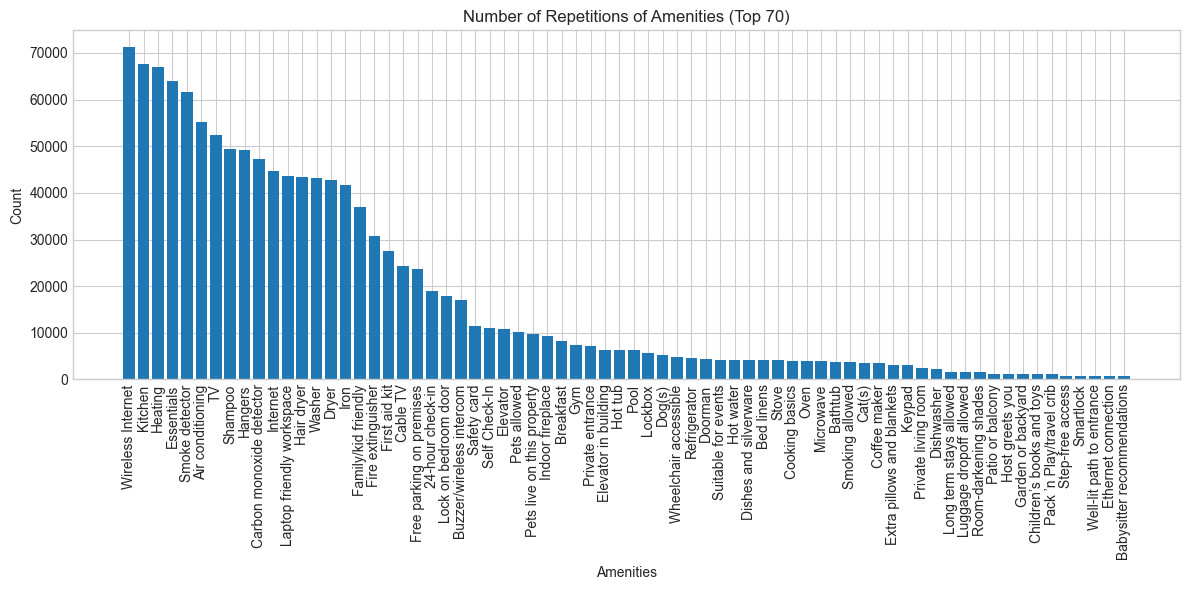

In [ ]:
# Count how many times each feature is passed
amenities_count = {amenity: df['amenities'].apply(lambda x: amenity in x).sum() for amenity in amenities}

# Let's sort the amenities_count by value from most to least
amenities_count_sorted = dict(sorted(amenities_count.items(), key=lambda item: item[1], reverse=True))

# Let's create the x and y values for the chart (in order)
x = list(amenities_count_sorted.keys())[:70]
y = list(amenities_count_sorted.values())[:70]

# Graph creation
plt.figure(figsize=(12, 6))
plt.bar(x, y)
plt.xticks(rotation=90)  
plt.xlabel('Amenities')
plt.ylabel('Count')
plt.title('Number of Repetitions of Amenities (Top 70)')
plt.tight_layout()
plt.show()

In [ ]:
#Converting the properties in the column into a table of 1 and 0 values.
amenities_df = pd.DataFrame(df['amenities'].apply(lambda x: [amenity in x for amenity in amenities]).tolist(), columns=amenities, index=df.index)
amenities_df = amenities_df.astype(int)
amenities_df

In [ ]:
# Take the number of values of each column, count the ones with value count 1 and sort them
value_counts_1 = amenities_df.apply(lambda col: col.value_counts().get(1, 0)).sort_values(ascending=False)

# Let's keep the first 25 columns and drop the remaining columns.
# When we examine the graph, we think that after this value will not affect our analysis.
selected_columns = value_counts_1.index[:24]
amenities_df = amenities_df[selected_columns]

amenities_df

In [ ]:
df = pd.concat([df.drop(columns='amenities'), amenities_df], axis=1)
df

* first_review

In [ ]:
import pandas as pd

def fill_missing_first_review_by_city(df):
    # Convert "host_since" and "first_review" columns to date data type.
    df['host_since'] = pd.to_datetime(df['host_since'])
    df['first_review'] = pd.to_datetime(df['first_review'])
    
    # Get unique cities from the "city" column
    cities = df['city'].unique()
    
    # Iterate over each city
    for city in cities:
        # Filter rows matching the current city
        filtered_df = df[df['city'] == city]
        
        # Calculate the average duration between "first_review" and "host_since" on the filtered_df
        average_duration = (filtered_df['first_review'] - filtered_df['host_since']).mean().days
        
        # Fill missing "first_review" values of rows matching the current city with the average value
        df.loc[(df['city'] == city) & (df['first_review'].isnull()), 'first_review'] = df.loc[(df['city'] == city) & (df['first_review'].isnull()), 'host_since'] + pd.DateOffset(days=average_duration)
    
    return df

# Example usage
df = fill_missing_first_review_by_city(df)


* host_since

In [ ]:
# Filters empty values in column 'host_since'
filtered_since = df[df['host_since'].isnull()]
#last review filters out empty values from the filtered values
filtered_since =  filtered_since[filtered_since['last_review'].isnull()]
# Returns whether the values in the selected properties are empty after 2 filters
selected_columns = filtered_since[['first_review', 'host_has_profile_pic', 'host_identity_verified']]

In [ ]:
#As a result of filtering, we drop these rows because the same row is empty in 9 properties.
df = df.drop(filtered_since.index)

Columns not to be feature engineered
beds - review_scores_rating - host_response_rate 

columns to drop
last_review - name

In [ ]:
columns_to_drop = ['column1', 'column3']
df = df.drop(columns=columns_to_drop)

8. <a id = "5"></a><br>
# Modeling